Are you a developer?(1, yes  0, no):  1


    Age  Gender    Education   Income  professionalExp homeStatus  loanAmount  \
0  22.0  Female       Master  71948.0                0       RENT     35000.0   
1  21.0  Female  High School  12282.0                0        OWN      1000.0   
2  25.0  Female  High School  12438.0                3   MORTGAGE      5500.0   
3  23.0  Female     Bachelor  79753.0                0       RENT     35000.0   
4  24.0    Male       Master  66135.0                1       RENT     35000.0   

  loanIntent  loanInterest  loanIncomePercent  creditLength  creditScore  \
0   PERSONAL         16.02               0.49           3.0          561   
1  EDUCATION         11.14               0.08           2.0          504   
2    MEDICAL         12.87               0.44           3.0          635   
3    MEDICAL         15.23               0.44           2.0          675   
4    MEDICAL         14.27               0.53           4.0          586   

  previousLoan  loanStatus  
0           No           1 

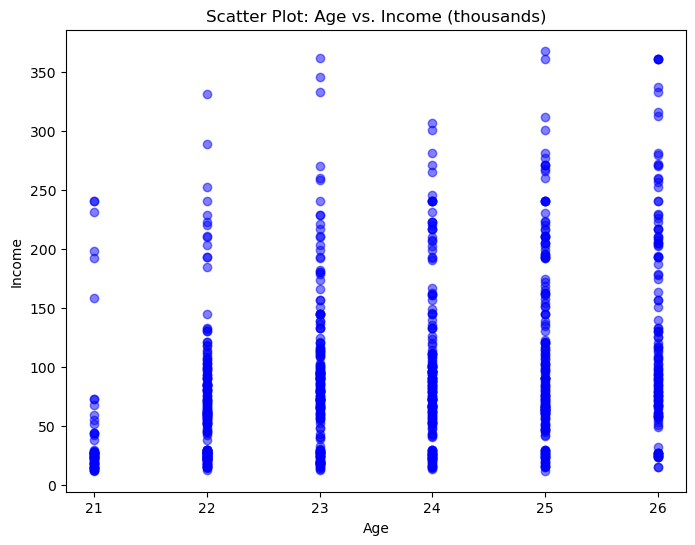

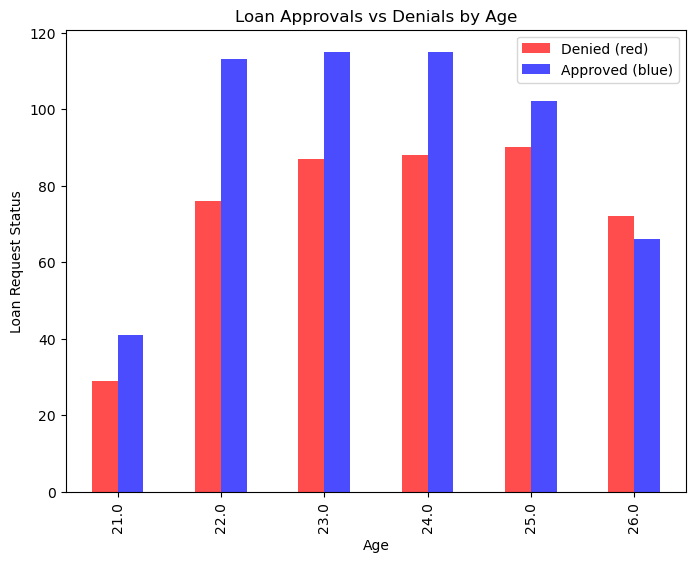


 DATA ENCODING
 Dataset size: 999 rows
 Highest Accuracy is 96.00%. Tuned parameters are n_neighbors = 5 and test_size = 0.05

 PERFORMANCE EVALUATIONS
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.94      1.00      0.97        32

    accuracy                           0.96        50
   macro avg       0.97      0.94      0.96        50
weighted avg       0.96      0.96      0.96        50

Accuracy Score =  96.0 %


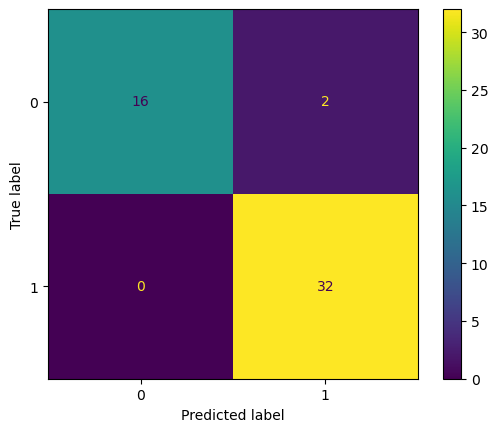


 PREDICT NEW LOAN APPROVALS


Enter gender(Male, Female):  Female
Enter age:  27
Enter income: $ 127000
Enter loan amount: $ 12000
Enter loan interest rate (%):  8.5
Enter credit length (years):  3
Enter credit score:  670
Enter home status (RENT, OWN, MORTGAGE):  RENT
Enter loan intent (PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT, DEBTCONSOLIDATION):  EDUCATION
Enter previous loan (Yes, No):  Yes


This customer is approved for their loan request.



 Please press Enter-key to continue or enter 'q' to Quit:  q


In [39]:
"""
Learning Agent using KNN Classifier

Created Oct 2025

@author: V_Morgan
"""

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

developer = 0;

class LearningAgentkNN:
    
    #Creating multiple encoder labels for the handful of variables that need encoding. Makes for easier expansion
    encoders = {}
    categorical_cols = ['Gender', 'homeStatus', 'loanIntent', 'previousLoan']
    
    def load_data(self, file_path):
        
        df = pd.read_csv(file_path)
        self.df = df
        
        print(df.head())
        
        print(df.shape)
        
    def visualizeData_bef_modeling(self):
        print('\n Visualize Data Patterns Before Modeling')
        df = self.df

        plot_df = df[(df['Age'] <= 30) & (df['Income'] < 600000)]
        
        x = plot_df['Age']
        y = plot_df['Income'] / 1000
        z = df['loanStatus']
        counts = df['loanStatus'].value_counts()

        # Create a scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, color='blue', alpha=0.5)
        plt.xlabel('Age')
        plt.ylabel('Income')
        plt.title('Scatter Plot: Age vs. Income (thousands)')
        plt.show()
        
        #Grouping the statuses by age
        age_status_counts = df.groupby([x, z]).size().unstack(fill_value=0)
        
        # Creating the bar graph
        age_status_counts.plot(kind='bar', figsize=(8, 6), color=['red', 'blue'], alpha=0.7)
        plt.xlabel('Age')
        plt.ylabel('Loan Request Status')
        plt.title('Loan Approvals vs Denials by Age')
        plt.legend(['Denied (red)', 'Approved (blue)'])
        plt.show()


    def data_preprocessing(self):
        df = self.df
        #Encoding non-binary data as that's necessary for this classifier. Using a loop method that allows for easy addition of new non-binary fields.
        print('\n DATA ENCODING') 
        print(f" Dataset size: {len(df)} rows")
        for col in self.categorical_cols:
            self.encoders[col] = LabelEncoder()
            df[f'{col}_enc'] = self.encoders[col].fit_transform(df[col])
        
        features = df[['Gender_enc', 'Age', 'Income', 'homeStatus_enc', 'loanAmount', 'loanIntent_enc', 'loanInterest', 'loanIncomePercent', 'creditLength', 'creditScore', 'previousLoan_enc']]
        label = df['loanStatus']

        #Added code to help hypertune parameters if a developer is running the program
        if (developer == 1):
            best_acc = -1
            best_neighbors = -1
            best_testSize = 0.0
        
            # Loop over test sizes and k values
            for test_size in [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45]:
                X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = test_size, random_state = 42)
        
                scaler = StandardScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)

                #range of n_neighbor values being tested. Starting at 3 and testing ever other value.
                for k in range(3, 34, 2):
                    model = KNeighborsClassifier(n_neighbors=k)
                    model.fit(X_train, y_train)
                    preds = model.predict(X_test)
                    acc = accuracy_score(y_test, preds)

                    #updating parameters if highest accuracy is found.
                    if acc > best_acc:
                        best_acc = acc
                        best_neighbors = k
                        best_testSize = test_size

            #Printing the highest found accuracy and the best tuned hyper parameters
            print(f" Highest Accuracy is {best_acc * 100:.2f}%. Tuned parameters are n_neighbors = {best_neighbors} and test_size = {best_testSize}")
        
        X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.05, random_state=42)
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        self.scaler = scaler
        
        self.df = df
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test

    
    def train_agent_predict_test(self):   
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        
        kNN_learner = KNeighborsClassifier(n_neighbors=5)
        kNN_learner.fit(X_train, y_train)
                
        self.pred = kNN_learner.predict(X_test)
        self.kNN_learner = kNN_learner
        
        
    def evaluate_KNN_agent(self):     
        print('\n PERFORMANCE EVALUATIONS')
        print(classification_report(self.y_test, self.pred))
        
        print("Accuracy Score = ",  accuracy_score(self.y_test, self.pred) * 100, "%")              
        
        kNN_learner = self.kNN_learner
        
        cm = confusion_matrix(self.y_test, self.pred, labels=kNN_learner.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=kNN_learner.classes_)
        disp.plot()
        plt.show()

    #function to predict new entries.
    def predict_new_percept(self, Gender, Age, Income, homeStatus, loanAmount, loanIntent, loanInterest, creditLength, creditScore, previousLoan): 
        Gender_enc = self.encoders['Gender'].transform([Gender])[0]
        homeStatus_enc = self.encoders['homeStatus'].transform([homeStatus])[0]
        loanIntent_enc = self.encoders['loanIntent'].transform([loanIntent])[0]
        previousLoan_enc = self.encoders['previousLoan'].transform([previousLoan])[0]

        #Calculating loanIncomePercent based on user input of loan amount and income
        loanIncomePercent = (loanAmount / Income) * 100

        #loading data to be stored in dataframe
        input_data = {
        'Gender_enc': Gender_enc,
        'Age': Age,
        'Income': Income,
        'homeStatus_enc': homeStatus_enc,
        'loanAmount': loanAmount,
        'loanIntent_enc': loanIntent_enc,
        'loanInterest': loanInterest,
        'loanIncomePercent': loanIncomePercent,
        'creditLength': creditLength,
        'creditScore': creditScore,
        'previousLoan_enc': previousLoan_enc
        }

        #Forming new dataFrame
        new_input = pd.DataFrame([input_data])
        
        # Scale and predict
        new_scaled = self.scaler.transform(new_input)
        new_pred = self.kNN_learner.predict(new_scaled)        

        #Display wether the customer is predicted to be approved or denied for the loan
        if (new_pred[0] == 1):
            print("This customer is approved for their loan request.")
        else:
            print("This customer is not approved for their loan request.")

               
            
#----------------------------Class Driver --------------------------------------    
agent = LearningAgentkNN()

devCheck = int(input("Are you a developer?(1, yes  0, no): "))

if (devCheck == 1):
    developer = 1
else:
    developer = 0

file_path = '1kloanDataWO.csv'

agent.load_data(file_path)

agent.visualizeData_bef_modeling()

agent.data_preprocessing()

agent.train_agent_predict_test()

agent.evaluate_KNN_agent()

# Agent designed as semi-autonomous with prompts or files

print('\n PREDICT NEW LOAN APPROVALS')
while True:       
    gender = str(input("Enter gender(Male, Female): "))
    age = int(input("Enter age: "))
    income = float(input("Enter income: $"))  
    loanAmount = float(input("Enter loan amount: $"))
    loanInterest = float(input("Enter loan interest rate (%): "))
    creditLength = float(input("Enter credit length (years): "))
    creditScore = float(input("Enter credit score: "))
    homeStatus = input("Enter home status (RENT, OWN, MORTGAGE): ")
    loanIntent = input("Enter loan intent (PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIMPROVEMENT, DEBTCONSOLIDATION): ")
    previousLoan = input("Enter previous loan (Yes, No): ")

    agent.predict_new_percept(gender, age, income, homeStatus, loanAmount, loanIntent, loanInterest, creditLength, creditScore, previousLoan)

    n = input("\n Please press Enter-key to continue or enter 'q' to Quit: ")
    if n.strip().lower() == 'q':
        break
